In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 df = pd.read_csv('Experiment2_modified(0.5-2).csv')
 df

,Animal ID,Group,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,1,ST,0,180,116,14.125,High
1,2,ST,0,180,80,13.637,High
2,3,ST,0,206,159,17.686,High
3,4,ST,0,191,240,12.913,High
4,5,ST,0,188,44,10.430,High
...,...,...,...,...,...,...,...
211,32,RN,120,149,110,7.414,High
212,33,RN,120,214,106,8.221,High
213,34,RN,120,186,83,8.990,High
214,35,RN,120,140,99,4.545,High


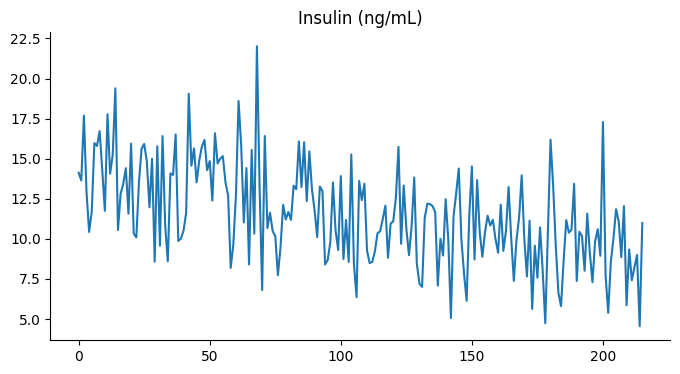

In [ ]:
# @title Insulin (ng/mL)

from matplotlib import pyplot as plt
df['Insulin (ng/mL)'].plot(kind='line', figsize=(8, 4), title='Insulin (ng/mL)')
plt.gca().spines[['top', 'right']].set_visible(False)

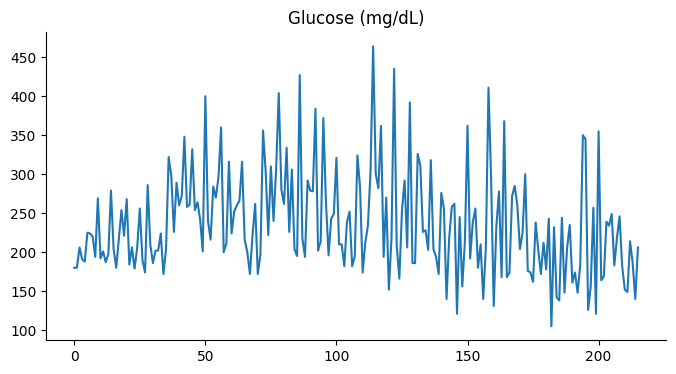

In [ ]:
# @title Glucose (mg/dL)

from matplotlib import pyplot as plt
df['Glucose (mg/dL)'].plot(kind='line', figsize=(8, 4), title='Glucose (mg/dL)')
plt.gca().spines[['top', 'right']].set_visible(False)

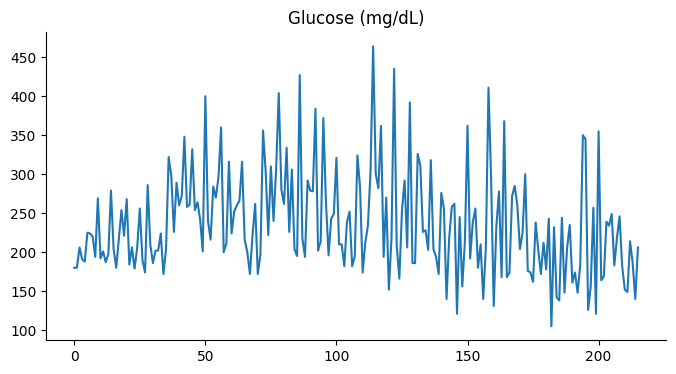

In [ ]:
# @title Glucose (mg/dL)

from matplotlib import pyplot as plt
df['Glucose (mg/dL)'].plot(kind='line', figsize=(8, 4), title='Glucose (mg/dL)')
plt.gca().spines[['top', 'right']].set_visible(False)

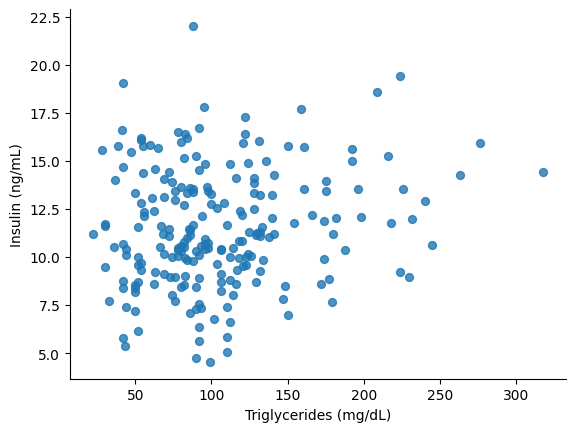

In [ ]:
# @title Triglycerides (mg/dL) vs Insulin (ng/mL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Triglycerides (mg/dL)', y='Insulin (ng/mL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

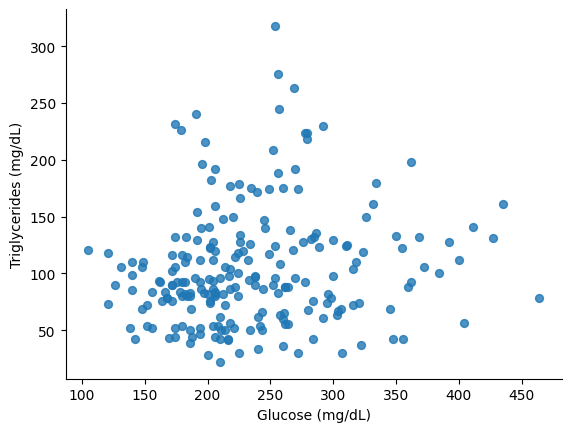

In [ ]:
# @title Glucose (mg/dL) vs Triglycerides (mg/dL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Glucose (mg/dL)', y='Triglycerides (mg/dL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = df.drop(columns='Animal ID')
df = df.drop(columns='Group')
df

,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,0,180,116,14.125,High
1,0,180,80,13.637,High
2,0,206,159,17.686,High
3,0,191,240,12.913,High
4,0,188,44,10.430,High
...,...,...,...,...,...
211,120,149,110,7.414,High
212,120,214,106,8.221,High
213,120,186,83,8.990,High
214,120,140,99,4.545,High


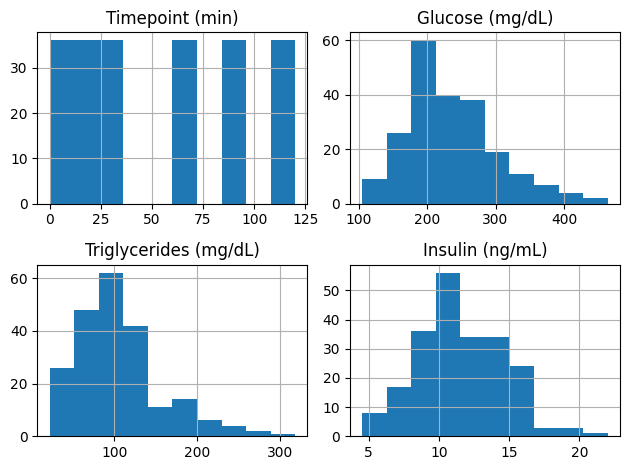

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
x = df.drop(columns='Insulin Level')
y = df['Insulin Level']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_val = ['Glucose (mg/dL)','Triglycerides (mg/dL)','Insulin (ng/mL)']
df[numerical_val] = scaler.fit_transform(df[numerical_val])
df


,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Level
0,0,0.208914,0.317568,0.548494,High
1,0,0.208914,0.195946,0.520554,High
2,0,0.281337,0.462838,0.752376,High
3,0,0.239554,0.736486,0.479102,High
4,0,0.231198,0.074324,0.336940,High
...,...,...,...,...,...
211,120,0.122563,0.297297,0.164262,High
212,120,0.303621,0.283784,0.210466,High
213,120,0.225627,0.206081,0.254494,High
214,120,0.097493,0.260135,0.000000,High


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
Rmodel = RandomForestClassifier(n_estimators=2000)
Rmodel.fit(x_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [ ]:
Rpredict = Rmodel.predict(x_test)
Rpredict

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High'], dtype=object)

In [ ]:
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)
Dpredict = Dmodel.predict(x_test)
Dpredict

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High'], dtype=object)

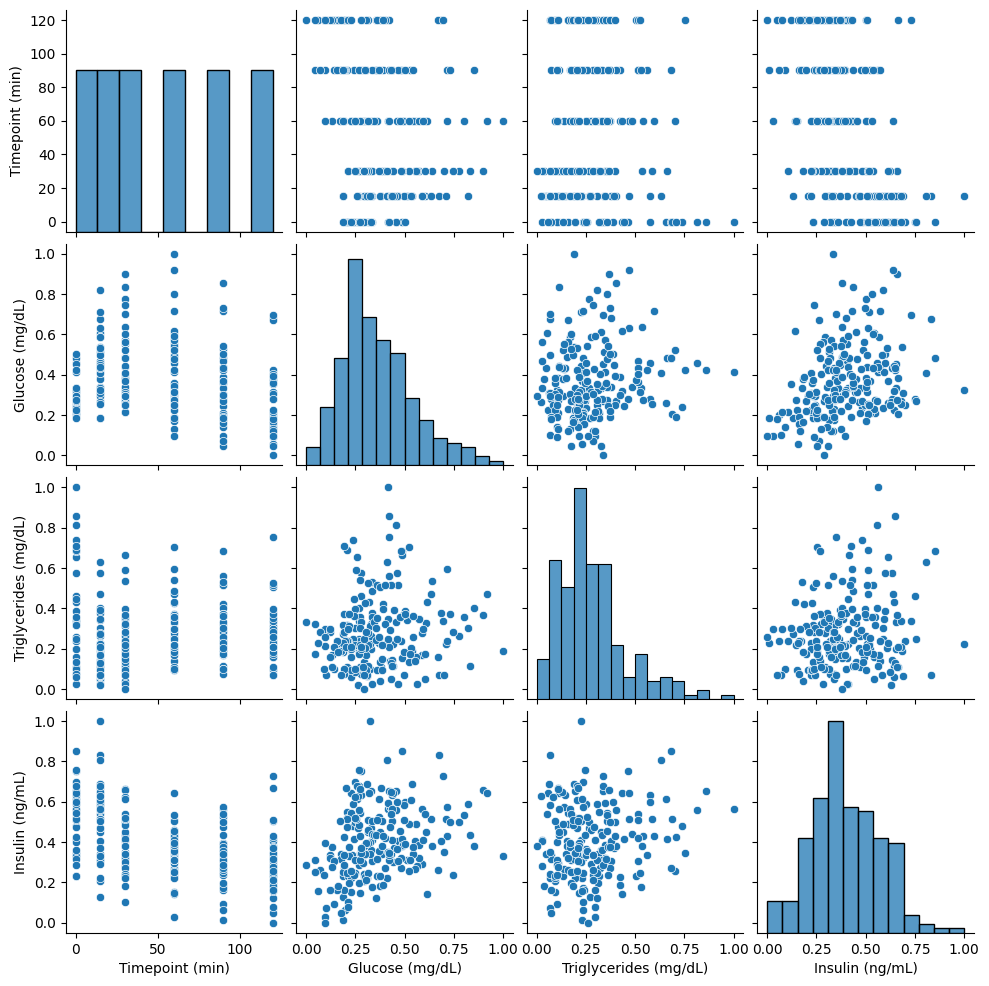

In [ ]:
sns.pairplot(df)

In [ ]:
Kmodel = KNeighborsClassifier(n_neighbors=3)
Kmodel.fit(x_train,y_train)
Kpredict = Kmodel.predict(x_test)
Kpredict

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High'], dtype=object)

In [ ]:
x

,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,0,180,116,14.125
1,0,180,80,13.637
2,0,206,159,17.686
3,0,191,240,12.913
4,0,188,44,10.430
...,...,...,...,...
211,120,149,110,7.414
212,120,214,106,8.221
213,120,186,83,8.990
214,120,140,99,4.545


In [ ]:
y

,Insulin Level
0,High
1,High
2,High
3,High
4,High
...,...
211,High
212,High
213,High
214,High


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
Rscore = accuracy_score(y_test,Rpredict)*100
Rscore

100.0

In [ ]:
Dscore = accuracy_score(y_test,Dpredict)*100
Dscore

100.0

In [ ]:
Kscore = accuracy_score(y_test,Kpredict)*100
Kscore

100.0

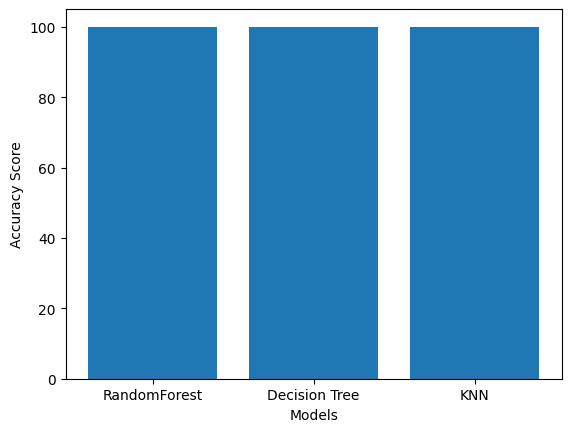

In [ ]:
Model =["RandomForest","Decision Tree","KNN"]
Score = [Rscore,Dscore,Kscore]
#plt.title('Accuracy Score Performance Comparsion')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(Model,Score,label='Accuracy score')
#plt.legend()
plt.show()

# **Recall Score**

In [ ]:
Rrc = recall_score(y_test, Rpredict, average='macro')*100
Drc = recall_score(y_test, Dpredict, average='macro')*100
Krc = recall_score(y_test, Kpredict, average='macro')*100

In [ ]:
Rrc

100.0

In [ ]:
Drc

100.0

In [ ]:
Krc

100.0

# **Precision Score**

In [ ]:
rps = precision_score(y_test, Rpredict, average='macro')*100
rps

100.0

In [ ]:
dps = precision_score(y_test, Dpredict, average='macro')*100
dps

100.0

In [ ]:
ps = precision_score(y_test, Kpredict, average='macro')*100
ps

100.0